In [1]:
import pandas as pd
import numpy as np
from PnLBook import PnLBook

df = pd.read_csv("signals_72.0.csv", header=None, names=["Price", "Signal"])
df["Symbol"] = df.index
df.head()

,Price,Signal,Symbol
CORN,19.320000,0,CORN
SOYB,24.030001,0,SOYB
WEAT,5.235000,0,WEAT
NG=F,1.829000,0,NG=F
CL=F,80.769997,0,CL=F


In [2]:
previous_signal = 0

def interpret_signals(signals):
    global previous_signal
    actions = []
    
    for signal in signals:
        if signal == 1:
            if previous_signal == 1:
                actions.append("Hold")
            else:
                actions.append("Buy")
        elif signal == -1:
            actions.append("Sell")
        else: # signal == 0
            actions.append("Sell")

        previous_signal = signal

    return actions

df['Action'] = df.groupby('Symbol')['Signal'].transform(interpret_signals)

In [3]:
book = PnLBook()

most_recent_prices = {}
value_over_time = []

for index, row in df.iterrows():
    most_recent_prices[row['Symbol']] = row['Price']
    if row['Action'] == 'Buy':
        book.buy(symbol = row['Symbol'],price = row['Price'], amount=100)
    elif row['Action'] == 'Sell':
        book.sell(symbol = row['Symbol'],price = row['Price'], amount=100)

    value_over_time.append(book.current_asset_value(most_recent_prices))

print(book.display_assets())

book.calculate_sharpe_ratio(.04)

{'Money': 10028.124415874481, 'NG=F': 0, 'CL=F': 0, 'WEAT': 0, 'CORN': 0, 'SOYB': 0}


0.019253446078176

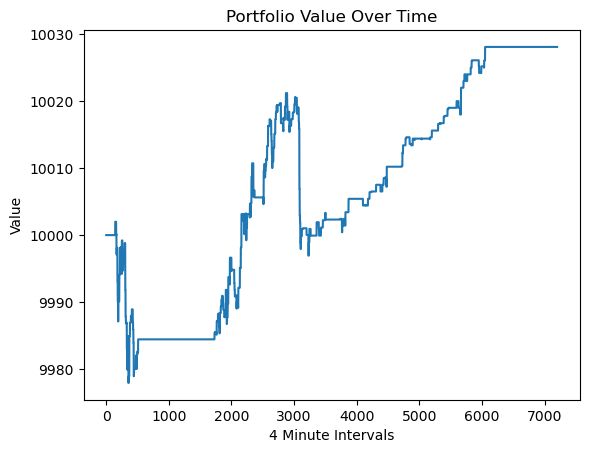

In [4]:
import matplotlib.pyplot as plt

plt.plot(value_over_time)
plt.title("Portfolio Value Over Time")
plt.xlabel("4 Minute Intervals")
plt.ylabel("Value")
plt.show()